In [1]:
from box import Box
import json
import os, sys
import cv2
import matplotlib.pyplot as plt
sys.path.insert(
    0, os.path.dirname(os.path.abspath('./')))
from image_embedding_retrieval.retrieve import retrieve

/Users/yhchen/anaconda3/envs/yi37/lib/python3.7/site-packages/tensorflow_addons-0.15.0-py3.7-macosx-10.9-x86_64.egg/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [2]:
with open('../config.json') as f:
    config = Box(json.loads(f.read()))
os.environ['CUDA_VISIBLE_DEVICES'] = config.gpu

In [3]:
def plot_query_similar( query_img, ret_img, dists):
    img0 = cv2.imread(query_img)
    fig, axs = plt.subplots(2, 2,figsize=(10,10))
    axs[0,0].set_title('query img')
    axs[0,0].imshow(img0[:, :, ::-1])
    for i in range(3):
        img_path = ret_img[i]
        img = cv2.imread(img_path)
        dist = round(dists[i],2)
        if i == 0:
            axs[0,1].imshow(img[:, :, ::-1], cmap='gray')
            axs[0,1].set_title('retrieve' + str(i + 1) + f':similar with dist {dist}')
        elif i == 1:
            axs[1,0].imshow(img[:, :, ::-1], cmap='gray')
            axs[1,0].set_title('retrieve' + str(i + 1) + f':similar with dist {dist}')
        else:
            axs[1,1].imshow(img[:, :, ::-1], cmap='gray')
            axs[1,1].set_title('retrieve' + str(i + 1) + f':similar with dist {dist}')

2022-06-14 14:45:26.104340: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-14 14:45:26.104556: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Use imagenet as weight init


2022-06-14 14:45:28.291257: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


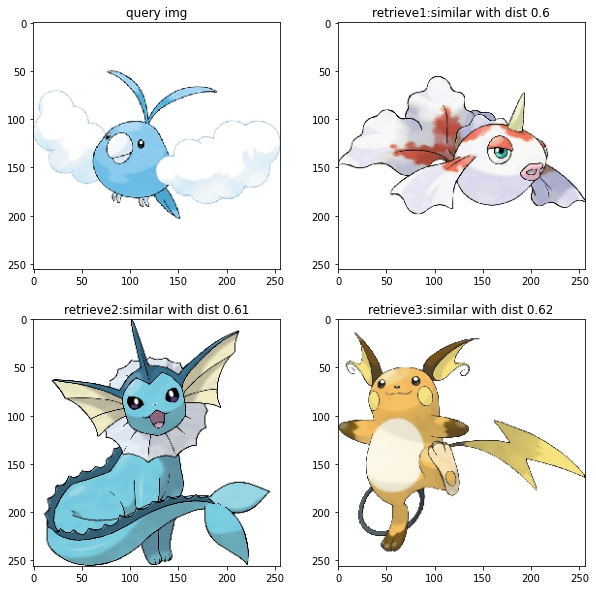

In [4]:
img_path1 = '../../exp/pokemon_jpg/333.jpg'
img_names, dists = retrieve(config, img_path1, 3)
plot_query_similar(img_path1 , img_names, dists)

Use imagenet as weight init


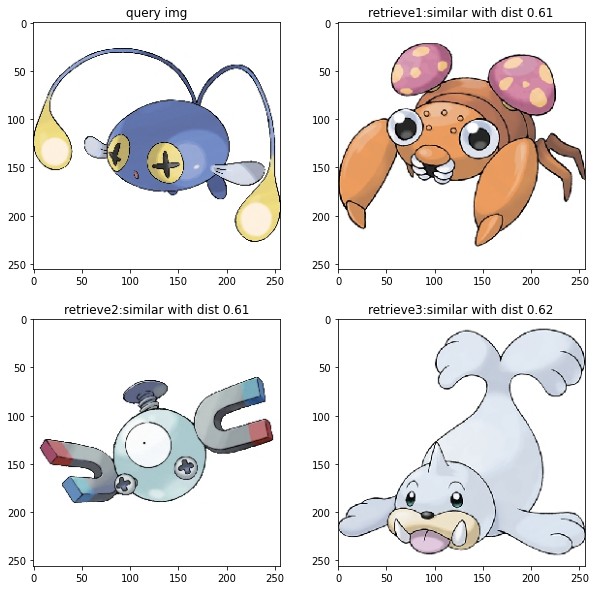

In [7]:
img_path2 = '../../exp/pokemon_jpg/170.jpg'
img_names, dists = retrieve(config, img_path2, 3)
plot_query_similar(img_path2 , img_names, dists)